# TESTS WITH INTERNET DATA

In [1]:
import pandas as pd
import plotly.express as px
import json
import plotly.graph_objects as go

# Read in the data

df_int = pd.read_csv("data/share-of-individuals-using-the-internet.csv")
df_int.head()

,Entity,Code,Year,Individuals using the Internet (% of population)
0,Afghanistan,AFG,1990,0.0
1,Afghanistan,AFG,1991,0.0
2,Afghanistan,AFG,1992,0.0
3,Afghanistan,AFG,1993,0.0
4,Afghanistan,AFG,1994,0.0


In [2]:
# Select data from the most recent YEAR for each COUNTRY

countries = []
mr_year = []

for grp, df in df_int.groupby("Code"):
    countries.append(grp)
    #print("GRP:", grp)
    mr_year.append(df["Year"].max())
    #print("YEAR:", df["Year"].max())

df_years = pd.DataFrame({"Code": countries, "most_recent_year": mr_year})

df_rec = pd.merge(df_years, df_int)
df_rec = df_rec[df_rec["Year"]==df_rec["most_recent_year"]]
df_rec.head()

,Code,most_recent_year,Entity,Year,Individuals using the Internet (% of population)
25,ABW,2017,Aruba,2017,97.170000
47,AFG,2017,Afghanistan,2017,11.447688
75,AGO,2017,Angola,2017,14.339079
104,ALB,2019,Albania,2019,69.642855
131,AND,2017,Andorra,2017,91.567467


In [4]:
df_rec.rename(columns = {"Individuals using the Internet (% of population)": "Percentage", "Entity": "Country"}, inplace = True)
df = df_rec
df.head()

,Code,most_recent_year,Country,Year,Percentage
25,ABW,2017,Aruba,2017,97.170000
47,AFG,2017,Afghanistan,2017,11.447688
75,AGO,2017,Angola,2017,14.339079
104,ALB,2019,Albania,2019,69.642855
131,AND,2017,Andorra,2017,91.567467


# CHOROPLETH 3D FUNCTION TEST WITH INTERNET DATA

In [14]:
def cplot(df):
    fig = go.Figure(data=go.Choropleth(
        locations=df['Code'],
        z=df['Percentage'],
        colorscale='ice',

        text=df['Country'],  # hover text
        marker_line_color='white',  # line markers between states
        colorbar_title="% Pop.", marker_line_width=0)
    )

    #fig.update_layout(title_text='World wide web usage,')
    fig.update_layout(margin=dict(l=50, r=50, t=50, b=50), height=640,
                      plot_bgcolor="#0e1117",
                      paper_bgcolor="#0e1117",
                      font_color="white",
                      geo_bgcolor="#0e1117",
                      )
    fig.update_geos(showlakes=False,
                    projection_type="orthographic",
                    projection_rotation=dict(lon=10, lat=45, roll=0),
                    )
    #fig.update_traces(unselected_marker_opacity=0.5, selector=dict(type='choropleth'))
    title='Im a title'
    description = 'Example description'
    key='inetusage'
    lib = 'plotly_go'
    info_dict=dict(title=title, description=description, lib=lib)
    return (key,fig,info_dict)

In [6]:
plot1 = cplot(df_rec)
plots = []
plots.append(plot1)
def get_plots():
    return plots

In [24]:
plot1(fig).show()

NameError: name 'fig' is not defined

# SCATTER MARKERS

In [26]:
fig = go.Figure(data=go.Scatter
                (x=t,
                 y=y,
                 mode='markers',
                 name=name, # legend
                 text=data # hover text
                ))

fig.update_layout(title=title)

fig.show()

NameError: name 't' is not defined

# FIG ONLY TESTS WITHOUT FUNCTION CODE

# CHOROPLETH 3D

Use case: global map showing status/stockpile per year

https://plotly.com/python/choropleth-maps/#choropleth-maps-with-gochoropleth

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations=df["Code"],
    z=z, # Data to be color-coded
    colorscale=colorscale,
    name=name, # legend
    text=text, # hover text
    marker_line_color=marker_line_color,  # line markers between states
    marker_line_width=0,
    colorbar_title=colorbar_title,
))

fig.update_layout(
    title_text=title_text,
    margin=dict(l=50, r=50, t=50, b=50),
    height=640,
    plot_bgcolor="#0e1117",
    paper_bgcolor="#0e1117",
    font_color="white",
    geo_bgcolor="#0e1117",
)

fig.update_geos(
    showlakes=False,
    projection_type="orthographic",
    projection_rotation=dict(lon=10, lat=45, roll=0),
)

# CHOROPLETH 2D

Use case: global map showing status/stockpile per year

https://plotly.com/python/choropleth-maps/#choropleth-maps-with-gochoropleth

fig = go.Figure(data=go.Choropleth(
    locations=df['Code'],
    z=df['Percentage'], # Data to be color-coded
    colorscale="Jet",
    #name=name, # legend
    text=df['Country'], # hover text
    marker_line_color="white",  # line markers between states
    marker_line_width=0,
    colorbar_title="% Pop.",
))

fig.update_layout(
    title_text="title",
    margin=dict(l=50, r=50, t=50, b=50),
    height=640,
    plot_bgcolor="#0e1117",
    paper_bgcolor="#0e1117",
    font_color="white",
    geo_bgcolor="#0e1117",
)

fig.show()

# BUBBLE MAP

Use case:
As a trace for global map showing status/stockpile per year

https://plotly.com/python/bubble-maps/#bubble-map-with-goscattergeo

In [42]:
# limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
# colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'country names',
        lon = df_sub['lon'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            #size = df_sub[COLUMN]/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = title_text,
        showlegend = True,
        geo = dict(
            #scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
)

NameError: name 'limits' is not defined

# SCATTER LINE

Use case:
Possession, 1945 to 2022
+ Events

https://plotly.com/python/line-charts/#line-plot-with-goscatter

In [ ]:
fig = go.Figure(data=go.Scatter(
    x=x,
    y=y,
    mode="lines",
    name=name, # legend
    text=data # hover text
))

fig.update_layout(title=title)

# SCATTER MARKER BUBBLES

Not sure if we will need this because we probably only need a bubble map as shown above.

https://plotly.com/python/line-and-scatter/#scatter-and-line-plots-with-goscatter

In [9]:
df.head()

,Code,most_recent_year,Country,Year,Percentage
25,ABW,2017,Aruba,2017,97.170000
47,AFG,2017,Afghanistan,2017,11.447688
75,AGO,2017,Angola,2017,14.339079
104,ALB,2019,Albania,2019,69.642855
131,AND,2017,Andorra,2017,91.567467


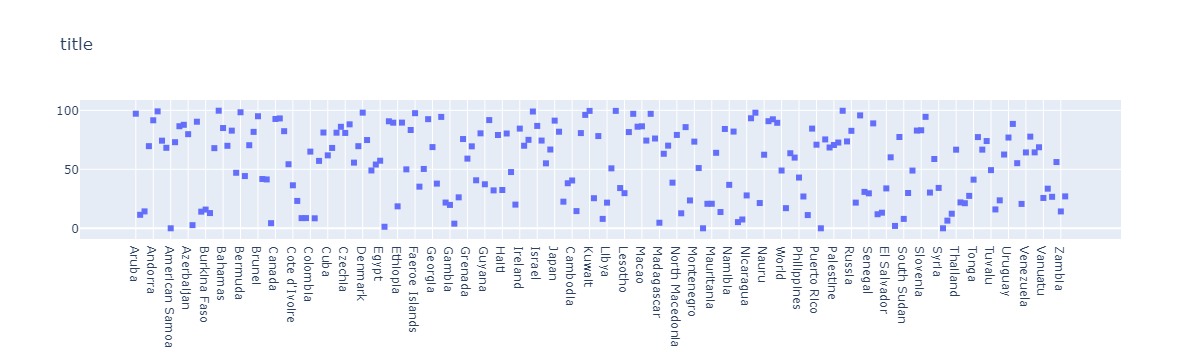

In [16]:
fig = go.Figure(data=go.Scatter(
    x=df['Country'],
    y=df['Percentage'],
    mode='markers',
    marker=dict(
        symbol="square",
        sizemode="area", # area
        #size=marker_size,
        #sizeref=sizeref, # max(df[column])*0.01
        #color="Year"),
        #name=name, # legend
        #text=data, # hover text
        #hovertemplate=hovertemplate,
)))

fig.update_layout(title="title")

fig.show()

# BAR VERTICAL (GROUP AND STACKED IN ONE FUNCTION?)

Use case:

Stacked: Tests, 1945 to 2022

https://plotly.com/python/bar-charts/#basic-bar-charts-with-plotlygraphobjects

In [ ]:
fig = go.Figure()

# for loop tba

# traceS ??? tba

fig.add_trace(go.Bar(
    x=x,
    y=y,
    name=name,
    hovertext=hovertext, # list ?
)
 
fig.update_traces(
    marker_color=marker_color,
    marker_line_color=marker_line_color,
    marker_line_width=1.5,
    opacity=0.6,
)

# choose barmode group or stacked?
    
fig.update_layout(
    barmode='group', # "stack"
    title_text=title_text,
)

# BAR HORIZONTAL

Use case:

Warhead inventories, 2022

https://plotly.com/python/horizontal-bar-charts/#horizontal-bar-chart-with-gobar

In [ ]:
fig = go.Figure()

# for loop tba

fig.add_trace(go.Bar(
    x=x,
    y=y,
    name=name,
    hovertext=hovertext, # list ?
)
 
fig.update_traces(
    marker_color=marker_color,
    marker_line_color=marker_line_color,
    marker_line_width=1.5,
    opacity=0.6,
)

# choose barmode group or stacked?
    
fig.update_layout(
    barmode='stack', # group, stack
    title_text=title_text,
)

# STATISTICAL METHODS

# HEATMAP

https://plotly.com/python/heatmaps/

# CORRELATIONS ...

# REGRESSION

https://plotly.com/python/linear-fits/